In [15]:
import pandas as pd
df = pd.read_csv('./data/train_stories.csv')
#java -mx5g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 1000000 --add-modules java.se.ee

In [16]:
from pycorenlp import StanfordCoreNLP
import re
import numpy as np

In [17]:
nlp = StanfordCoreNLP('http://localhost:9000')

In [18]:
df.shape

(88161, 7)

In [19]:
print(df.loc[0])

storyid                    8eb647c6-cdfa-416a-b4a2-09b24f44dcc5
storytitle                                     Kelly Made Pizza
sentence1     Kelly found her grandmother's pizza recipe in ...
sentence2     Kelly reminisced about how much she loved her ...
sentence3     Kelly decided that she was going to try to mak...
sentence4     Kelly studied the recipe and gathered everythi...
sentence5     Kelly successfully made a pizza from her grand...
Name: 0, dtype: object


In [20]:
def analyse(text):
    text = (text)
    output = nlp.annotate(text, properties={
      'annotators': 'sentiment',
      'outputFormat': 'json',
        'timeout': 15000
      })
    return output


In [21]:
def getValues(output):
    if isinstance(output,str):
        values = output.split('sentimentDistribution":[')[1].split('],"sentimentTree":')[0].replace('0,','0.').split(',')
        values = [float(value) for value in values]
        return values
    if isinstance(output,dict):
        uglyList = output['sentences'][0]['sentimentDistribution']
        correctedList = [float('%d.%d' %(uglyList[2*i],uglyList[2*i+1])) for i in range(5)]
        return correctedList

In [36]:
import sqlite3
db = sqlite3.connect("./data/mydb_dist")

In [60]:
cursor = db.cursor()
#cursor.execute('''DROP TABLE sentences''')
cursor.execute('''
    CREATE TABLE sentences(id INTEGER PRIMARY KEY, storyId INT, sentenceId INT,
                       sentence TEXT, highestscore INT)
''')
db.commit()

In [61]:
int(np.argmax(values))

1

In [77]:
stories = 88160
sentences = 6
scores = np.zeros((88160, 6, 5))

for i in range(3309,stories):
    for j in range(1,sentences+1):
        text = df.loc[i][j] 
        output = analyse(text)
        values = getValues(output)
        #print(text)
        #print(values)
        scores[i,j-1,0] =values[0]
        scores[i,j-1,1] =values[1]
        scores[i,j-1,2] =values[2]
        scores[i,j-1,3] =values[3]
        scores[i,j-1,4] =values[4]
        cursor = db.cursor()
        cursor.execute('''INSERT INTO sentences(storyId, sentenceId, sentence, highestscore) VALUES(?,?,?,?)''',
                               (i, j, text, int(np.argmax(values))))
        db.commit()


IndexError: list index out of range

In [78]:
query = cursor.execute('''SELECT * FROM sentences order by storyId desc LIMIT 5''')
query.fetchall()

[(447665, 74607, 1, 'The Birthday Cake', 2),
 (447659, 74606, 1, 'Eggs', 2),
 (447660, 74606, 2, 'Chris never liked eggs.', 2),
 (447661, 74606, 3, 'One day his girlfriend was cooking breakfast.', 2),
 (447662, 74606, 4, 'She was making eggs and bacon.', 3)]

In [79]:
scores

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 

In [80]:
scores.shape
#scores[0,0,:]

(88160, 6, 5)

In [43]:
import matplotlib.pyplot as plt

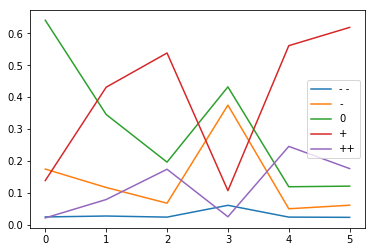

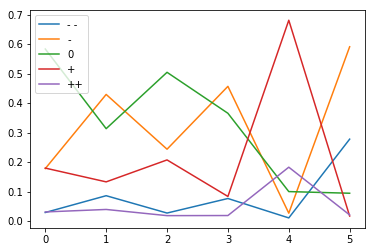

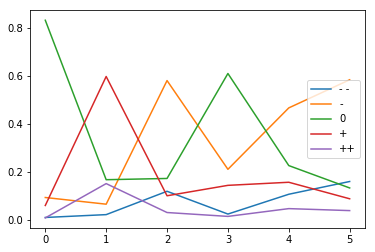

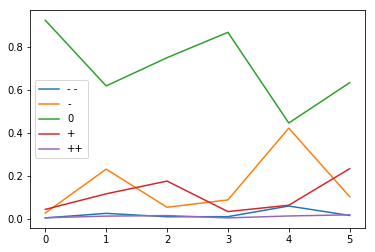

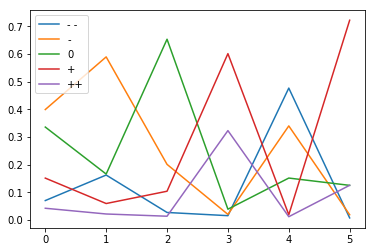

In [44]:
def plotScoresAsLines(scores):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    fig4, ax4 = plt.subplots()
    fig5, ax5 = plt.subplots()

#for each story, i want to plot all predictions of moods
    for i in range(5):
        ax1.plot(scores[0,:,i])
        ax2.plot(scores[1,:,i])   
        ax3.plot(scores[2,:,i])
        ax4.plot(scores[3,:,i])             
        ax5.plot(scores[4,:,i])
        ax1.legend(['- -','-','0','+','++'])
        ax2.legend(['- -','-','0','+','++'])
        ax3.legend(['- -','-','0','+','++'])
        ax4.legend(['- -','-','0','+','++'])
        ax5.legend(['- -','-','0','+','++'])

    plt.show()
    
plotScoresAsLines(scores)
plt.show()

# the moods in each story for each sentence.
# panel : story
# x-axis: title, sentences
# mood: coloured lines

In [45]:
df.loc[0]

storyid                    8eb647c6-cdfa-416a-b4a2-09b24f44dcc5
storytitle                                     Kelly Made Pizza
sentence1     Kelly found her grandmother's pizza recipe in ...
sentence2     Kelly reminisced about how much she loved her ...
sentence3     Kelly decided that she was going to try to mak...
sentence4     Kelly studied the recipe and gathered everythi...
sentence5     Kelly successfully made a pizza from her grand...
Name: 0, dtype: object

In [252]:
scores

array([[[0.02444282, 0.1744698 , 0.64113844, 0.13858108, 0.02136786],
        [0.02731407, 0.11681507, 0.34573967, 0.43113588, 0.07899531],
        [0.02386139, 0.06749162, 0.1962512 , 0.53844947, 0.17394634],
        [0.06087571, 0.37500282, 0.4322739 , 0.10687011, 0.02497746],
        [0.0239085 , 0.04999749, 0.11906059, 0.56141542, 0.245618  ],
        [0.02316354, 0.06118241, 0.12100413, 0.61868123, 0.17596869]],

       [[0.02888488, 0.17782684, 0.58309555, 0.17941727, 0.03077547],
        [0.08581891, 0.42915443, 0.31310494, 0.13272519, 0.03919653],
        [0.0270126 , 0.24347272, 0.50414898, 0.20712156, 0.01824413],
        [0.07633386, 0.45655198, 0.36523865, 0.0832863 , 0.0185892 ],
        [0.01051281, 0.02656612, 0.09976944, 0.68067467, 0.18247697],
        [0.27758547, 0.59076348, 0.09417953, 0.01685772, 0.0206138 ]],

       [[0.00966941, 0.0927215 , 0.83031062, 0.05951374, 0.00778474],
        [0.02148113, 0.06491646, 0.16680484, 0.59622921, 0.15056835],
        [0.11862

In [258]:
np.argmax(scores[0,0,:])

2

In [46]:
highestscores = np.zeros((stories, 6))
stories = 100
sentences = 6
for i in range(stories):
        highestscores[i,0] = np.argmax(scores[i,0,:])
        highestscores[i,1] = np.argmax(scores[i,1,:])
        highestscores[i,2] = np.argmax(scores[i,2,:])
        highestscores[i,3] = np.argmax(scores[i,3,:])
        highestscores[i,4] = np.argmax(scores[i,4,:])
        highestscores[i,5] = np.argmax(scores[i,5,:])

In [47]:
highestscores
#legend:
#0: --, 1: -, 2: 0, 3: +, 4:++

array([[2., 3., 3., 2., 3., 3.],
       [2., 1., 2., 1., 3., 1.],
       [2., 3., 1., 2., 1., 1.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [48]:
np.savetxt('data/Stanford_highscores10000.txt',highestscores, fmt='%i',delimiter=',',header="title,s1,s2,s3,s4,s5")